**1. Insights Into The Wine Dataset**
- Top 5 Wine Producing Countries - Number Of Wines Produced
- Top 5 Wineries Producing Countries - Number Of Wines Produced
- Points Given To Wines Produced By Top 5 Wineries - Number Of Wines Produced
- Points Given To Wines Belonging To Top 5 Varieties
- Distribution Of Points Given To Top 5 Wine Varieties


**2. Build a predictive model for predicting the wine “variety**
- xgboost


## Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [35]:
dataset = pd.read_csv('Downloads/OSX_DS_assignment.csv')

In [36]:
dataset.drop(dataset.columns[0],axis = 1,inplace=True)
dataset.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [37]:
dataset.shape

(103322, 11)

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             103283 non-null  object 
 1   review_title        103322 non-null  object 
 2   review_description  103322 non-null  object 
 3   designation         73686 non-null   object 
 4   points              103322 non-null  int64  
 5   price               96359 non-null   float64
 6   province            103283 non-null  object 
 7   region_1            87254 non-null   object 
 8   region_2            44863 non-null   object 
 9   winery              103322 non-null  object 
 10  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ MB


<a id = 'section1'></a>

## 1:Top 5 Wine Producing Countries with count

In [39]:
countries_list = pd.DataFrame(dataset.country.value_counts(dropna = True)).iloc[0:5]
countries_list['Index'] = list(range(0,5))
countries_list['Country_Name'] = countries_list.index.values
countries_list.set_index('Index',inplace = True)
countries_list.columns = ['Number Of Wines Produced','Country']
countries_list

,Number Of Wines Produced,Country
Index,,
0,48153,US
1,19932,France
2,11370,Italy
3,4038,Portugal
4,3630,Chile


Text(0.5, 0, 'Number Of Wines Produced')

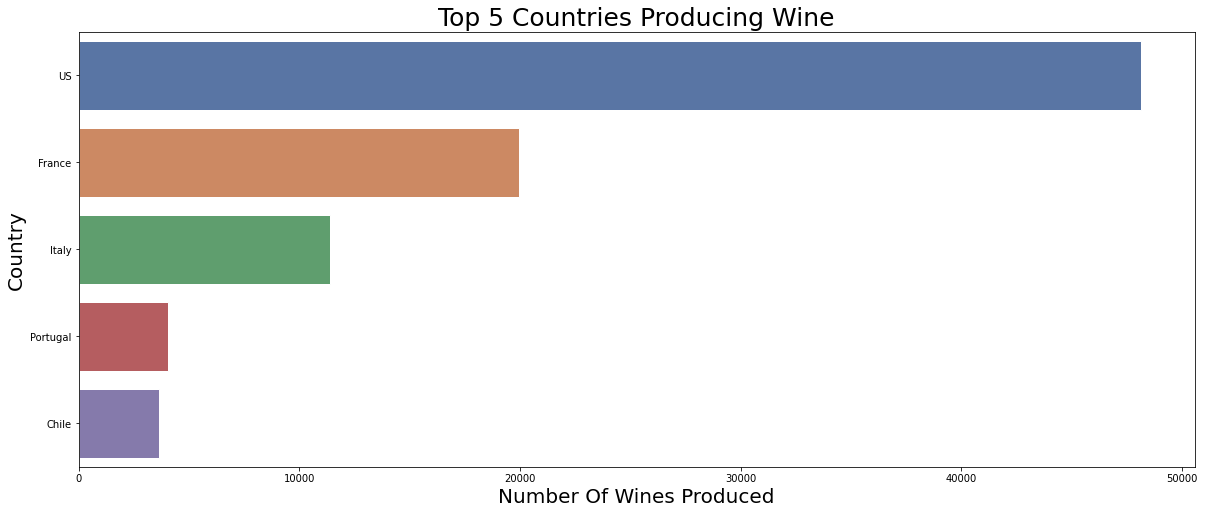

In [40]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="Number Of Wines Produced", data=countries_list)
plt.title("Top 5 Countries Producing Wine",fontsize = 25)
plt.ylabel("Country",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

<a id = 'section2'></a>

## 2:Top 5 Wineries Producing - Number Of Wines Produced

In [41]:
winery_list = pd.DataFrame(dataset.winery.value_counts(dropna = True)).iloc[0:5]
winery_list['Index'] = list(range(0,5))
winery_list['Winery_Name'] = winery_list.index.values
winery_list.set_index('Index',inplace = True)
winery_list.columns = ['Number Of Wines Produced','Winery']
winery_list

,Number Of Wines Produced,Winery
Index,,
0,217,Testarossa
1,203,Williams Selyem
2,199,Louis Latour
3,195,Georges Duboeuf
4,187,Chateau Ste. Michelle


Text(0.5, 0, 'Number Of Wines Produced')

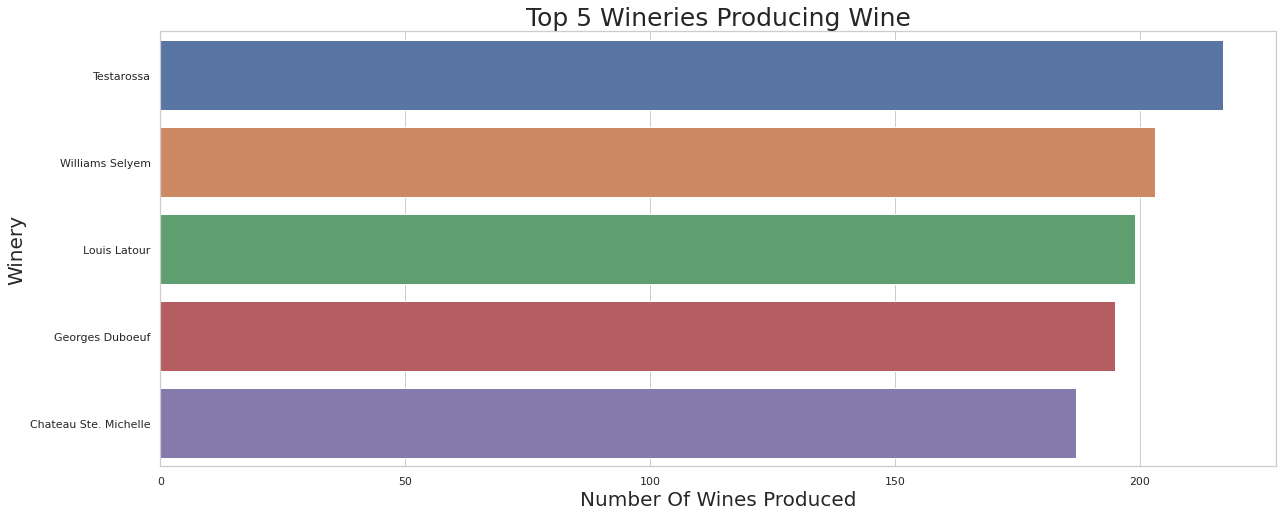

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(style="whitegrid")
sns.barplot(y="Winery", x="Number Of Wines Produced", data=winery_list)
plt.title("Top 5 Wineries Producing Wine",fontsize = 25)
plt.ylabel("Winery",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

<a id = 'section3'></a>

<a id = 'section5'></a>

## 3:Points Given To Wines Belonging To Top 5 Varieties

In [43]:
top_variety = pd.DataFrame(dataset['variety'].value_counts()[0:5])
top_variety['Index'] = list(range(0,5))
top_variety['Variety_Name'] = top_variety.index.values
top_variety.set_index('Index',inplace = True)
top_variety

,variety,Variety_Name
Index,,
0,13272,Pinot Noir
1,11753,Chardonnay
2,9472,Cabernet Sauvignon
3,8946,Red Blend
4,6915,Bordeaux-style Red Blend


Text(0.5, 1.0, 'Points Given To Wines Belonging To Top 5 Varieties')

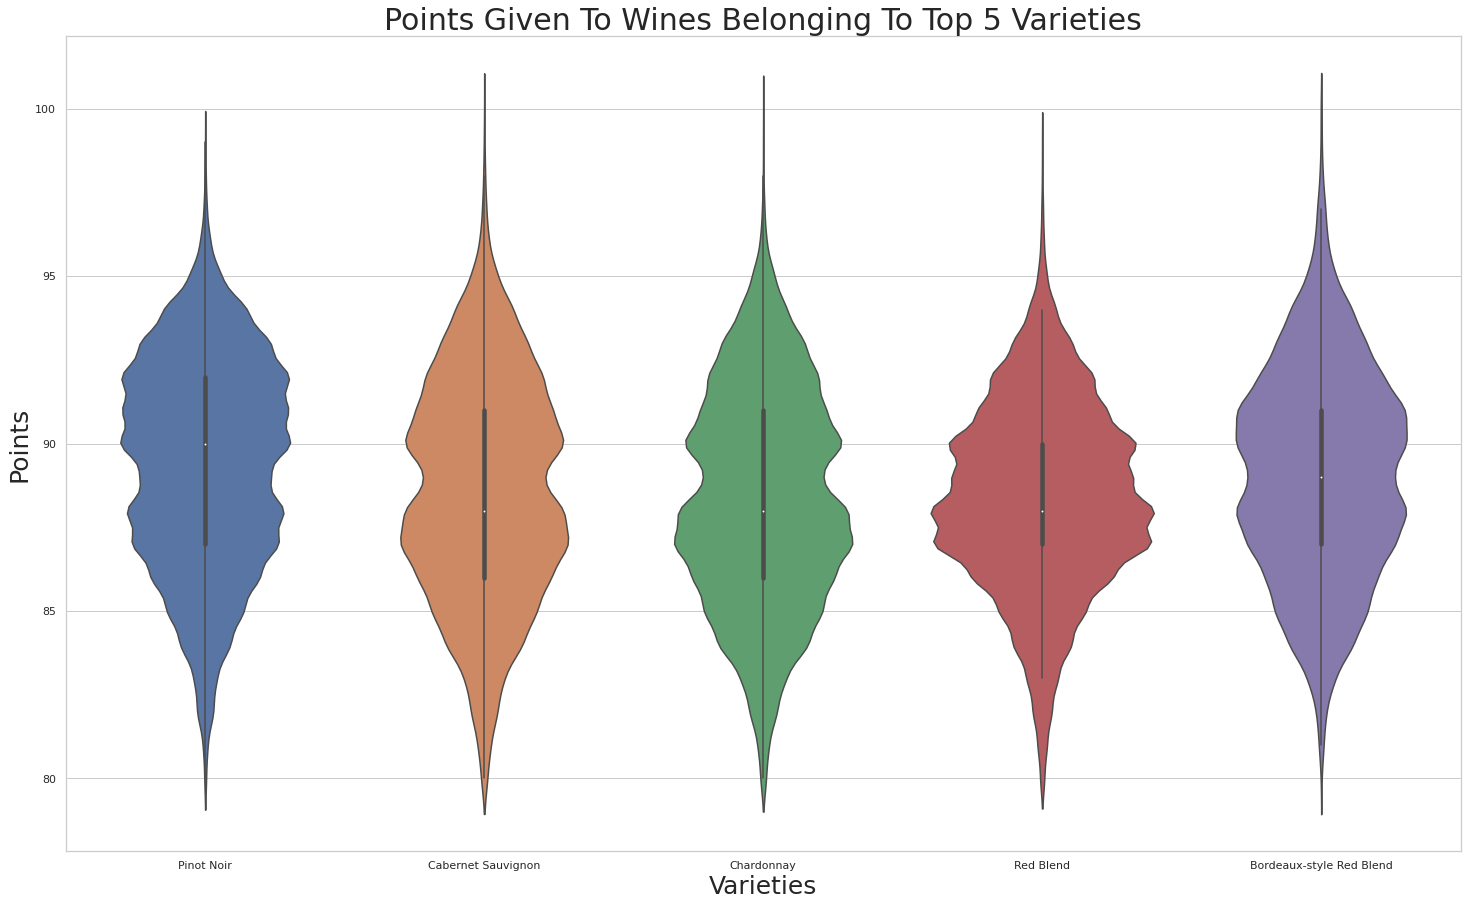

In [44]:
varieties_points = dataset[['points','variety']]
varieties_points = varieties_points[varieties_points.variety.isin(top_variety.Variety_Name)]
fig, ax = plt.subplots(figsize=(25,15))
sns.set_style("whitegrid")
sns.violinplot(x="variety", y="points", data=varieties_points)
plt.ylabel("Points",fontsize = 25)
plt.xlabel("Varieties",fontsize = 25)
plt.title("Points Given To Wines Belonging To Top 5 Varieties",fontsize = 30)

<a id = 'section6'></a>

## 4:Distribution Of Points Given To Top 5 Wine Varieties

In [45]:
res = pd.DataFrame(dataset[dataset['variety'] == 'Pinot Noir'].groupby('points').count()).iloc[:,0]
variety_points_dist = res
res = pd.DataFrame(dataset[dataset['variety'] == 'Chardonnay'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(dataset[dataset['variety'] == 'Cabernet Sauvignon'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(dataset[dataset['variety'] == 'Red Blend'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(dataset[dataset['variety'] == 'Bordeaux-style Red Blend'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
variety_points_dist.columns = ['Pinot Noir','Chardonnay','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend']
variety_points_dist

,Pinot Noir,Chardonnay,Cabernet Sauvignon,Red Blend,Bordeaux-style Red Blend
points,,,,,
80,16.0,46,41,25.0,3
81,39.0,86,82,56.0,23
82,150.0,222,176,114.0,45
83,197.0,350,246,184.0,127
84,452.0,733,507,350.0,310
85,684.0,954,687,512.0,450
86,969.0,1125,859,832.0,523
87,1328.0,1467,1128,1325.0,710
88,1434.0,1392,1064,1351.0,849


Text(0.5, 0, 'Points')

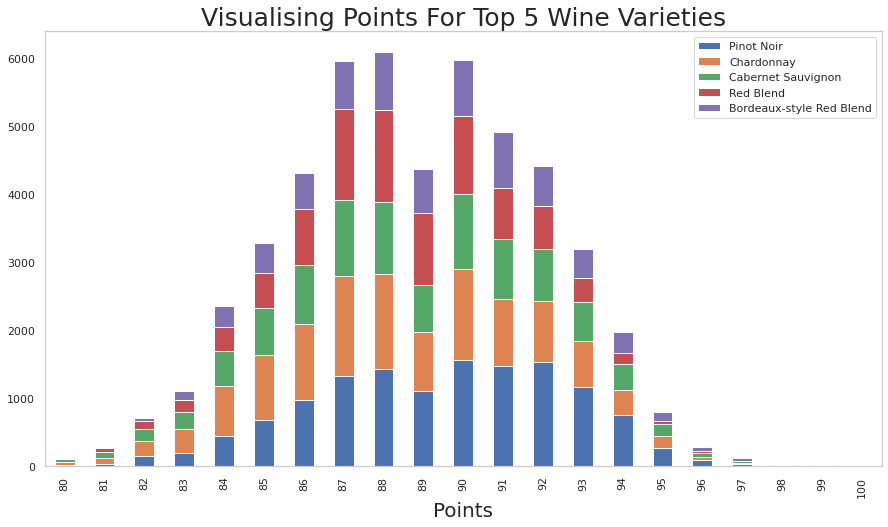

In [46]:
variety_points_dist.plot.bar(stacked = True,figsize = (15,8),grid = False)
plt.title("Visualising Points For Top 5 Wine Varieties",fontsize = 25)
plt.xlabel("Points",fontsize = 20)

<a id = 'section9'></a>

## 5:Top 5 Wine Producing Countries - Highest Rated

In [47]:
top_5_countries_pw = dataset.groupby('country').mean().sort_values(by = ['points'],ascending = False)
top_5_countries_pw = pd.DataFrame(top_5_countries_pw.iloc[0:5,0])
top_5_countries_pw['Index'] = list(range(5))
top_5_countries_pw['Country'] = top_5_countries_pw.index.values
top_5_countries_pw.set_index(['Index'],inplace = True)
top_5_countries_pw

,points,Country
Index,,
0,91.581081,England
1,90.312060,Austria
2,89.970165,Germany
3,89.500000,India
4,89.311321,Canada


In [48]:
top_5_countries_cnt = dataset.groupby('country').count()
top_5_countries_cnt['Index'] = list(range(len(top_5_countries_cnt)))
top_5_countries_cnt['Country'] = top_5_countries_cnt.index.values
top_5_countries_cnt.set_index(['Index'],inplace = True)
top_5_countries_cnt = top_5_countries_cnt[top_5_countries_cnt.Country.isin(top_5_countries_pw.Country)]
disp = top_5_countries_cnt[['Country','winery']]
disp.columns = ['Country','Number Of Wines Produced']
disp

,Country,Number Of Wines Produced
Index,,
3,Austria,2413
6,Canada,212
11,England,74
14,Germany,1944
17,India,2


Text(0.5, 0, 'Number Of Wines Produced')

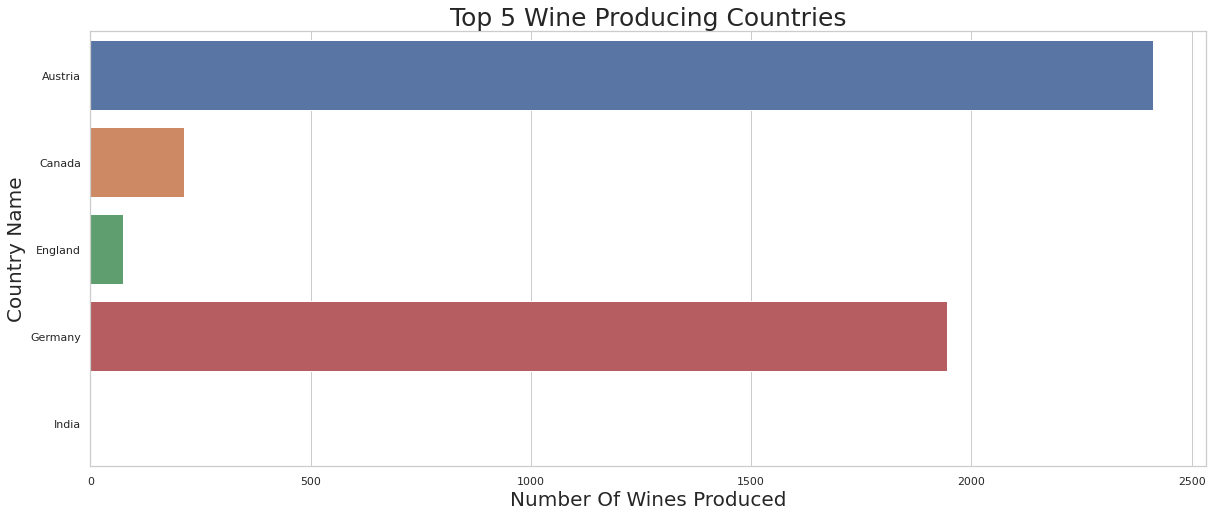

In [49]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="variety", data=top_5_countries_cnt)
plt.title("Top 5 Wine Producing Countries",fontsize = 25)
plt.ylabel("Country Name",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

# build prediction model on wine variety

<a id = 'section10'></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
sw = stopwords.words('english')

In [2]:
dataset = pd.read_csv('Downloads/OSX_DS_assignment.csv')

In [3]:
dataset.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           79191 non-null   object 
 1   country             103283 non-null  object 
 2   review_title        103322 non-null  object 
 3   review_description  103322 non-null  object 
 4   designation         73686 non-null   object 
 5   points              103322 non-null  int64  
 6   price               96359 non-null   float64
 7   province            103283 non-null  object 
 8   region_1            87254 non-null   object 
 9   region_2            44863 non-null   object 
 10  winery              103322 non-null  object 
 11  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [ ]:
dataset.dropna(axis=0)

In [5]:
dataset.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

In [6]:
dataset =dataset.rename(columns={'review_description':'description'})

In [7]:
input_data = dataset['description']
output_data = dataset['variety']

How many varieties of wine do we have in this dataset?

In [8]:
print ('There are %d varieties of wines in this dataset' % len(set(output_data)))

There are 28 varieties of wines in this dataset


In [9]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

array([26, 15, 13, ...,  7, 13,  7])

Now it is time to clean the description data

In [10]:
input_data = input_data.str.lower()

In [11]:
list_aux = []
for phase_word in input_data:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data = list_aux

In [12]:
countVectorizer = CountVectorizer()
input_data = countVectorizer.fit_transform(input_data)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, stratify = output_data) 

In [28]:
y_train.shape

(82657,)

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb = XGBClassifier().fit(X_train, y_train)

In [31]:
pred  = xgb.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [50]:
# accuracy of test data

In [33]:
accuracy_score(pred, y_test)

0.6986692475199613

## future
- deep learninig model
-  algorithmns and parameter tuning for better perfomance using grid search or radomised search cross validation
